In [7]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt

# Read data from csv and print the first few rows to instpect the set.
medals = pd.read_csv("../datasets/medals_by_country_2016.csv", index_col=0)
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


# Quantitative comparisons: bar-charts

### Bar Chart

/var/folders/py/0t0zfhzj2dz91fv8lz04vw6h0000gn/T/ipykernel_97923/2016095535.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


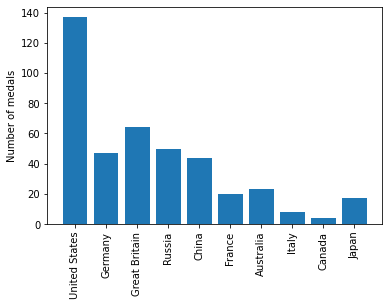

In [12]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

### Stacked bar chart

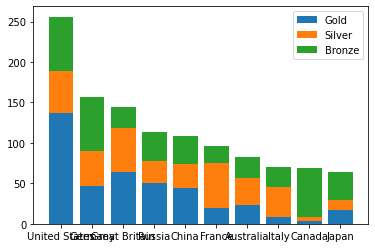

In [13]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold']+medals['Silver'], label="Bronze")


# Display the legend
ax.legend()

plt.show()

# Quantitative comparisons: histograms

In [18]:
# import dataset
mens_rowing = pd.read_csv("../datasets/mens-rowing.csv")
mens_rowing.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
2,14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze
3,15215,8214,Jacob Jepsen Barse,M,27.0,188.0,73.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Silver
4,18441,9764,Alexander Belonogoff,M,26.0,187.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Silver


In [19]:
mens_gymnastics = pd.read_csv("../datasets/mens_gymnastics.csv")
mens_gymnastics.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
1,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
2,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
3,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
4,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze


### Creating histograms

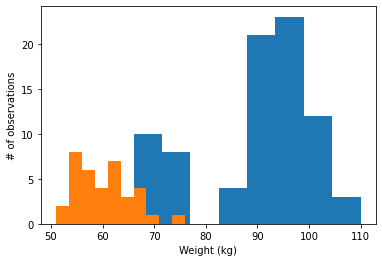

In [20]:
# Call plt.subplots initalize the Figure and Axes
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

### "Step" histogram